In [8]:
import sys
# sys.path.insert(0,'/h`ome/xinglu/prj/open-reid')
sys.path.insert(0,'/home/xinglu/prj/luzai-tool/')
from lz import * 
import lz 
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


/home/xinglu/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[False]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


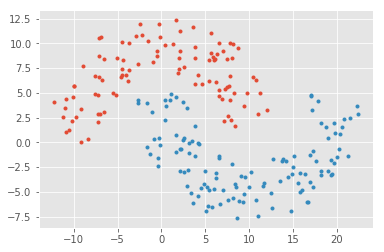

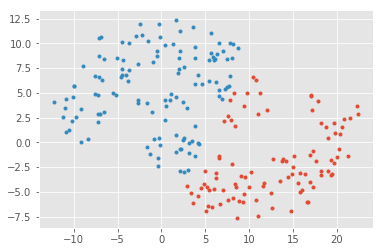

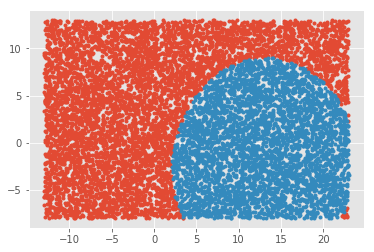

In [68]:
%run main.py

In [72]:

from pandas import *

df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
		'key2' : ['one', 'two', 'one', 'two', 'one'],
		'data1' : np.random.randn(5),
		'data2' : np.random.randn(5)})

df

dict(list(df.groupby(df['key1'])))['a'].quantile(.9)

people = DataFrame(np.random.randn(5, 5),
        columns=['a', 'b', 'c', 'd', 'e'],
        index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

people

key = ['one', 'two', 'one', 'two', 'one']
func = lambda x: x.describe()
people.groupby(key).apply(func)
people.groupby(key).transform(np.mean)

# np.mean(
dict(list(people.groupby(key)))['one']
#         ,axis=0)
people.groupby(key).agg(lambda x: np.mean(x,axis=0))

people.apply(func)

func = lambda x: x.describe()
people.groupby(key).apply(func)

In [109]:
import re 
line = "booobbboobboo"
pattern = ".*?(b.*?b).*?" 
match_obj = re.match(pattern, line) 
if match_obj:
    print(match_obj.group(1))

booob


In [114]:
from lz import * 

In [116]:
db=Database('input/cleaned.h5') 

In [118]:
X=db['train'] 
y=db['train_label']

In [155]:
hidden = X 
datamat = np.concatenate((hidden, np.ones((X.shape[0], 1))), axis=1)
param = np.dot(np.dot(np.linalg.inv(np.dot(datamat.T, datamat)  
                                   +1e-8*np.diag(np.ones(271))
                                   ), datamat.T), y)

w=param[:-1]
b=param[-1]
w.shape

X_val=db['val'] 
y_val=db['val_label']

y_pred=np.dot(X_val,w)+b

from sklearn.metrics import r2_score

r2_score(y_true=y_val, y_pred=y_pred)

(270,)

0.886479637578671

In [158]:
hidden = X 
datamat = np.concatenate((hidden, np.ones((X.shape[0], 1))), axis=1)
param = np.dot(np.dot(np.linalg.inv(np.dot(datamat.T, datamat)  
                                   +1e-5*np.diag(np.ones(271))
                                   ), datamat.T), y)

w=param[:-1]
b=param[-1]
w.shape

X_val=db['val'] 
y_val=db['val_label']

y_pred=np.dot(X_val,w)+b

from sklearn.metrics import r2_score

r2_score(y_true=y_val, y_pred=y_pred)

(270,)

0.8865104916007207

In [162]:
plt.plot?

[[-1 -1 -1]
 [-1 -1  1]
 [ 1 -1 -1]
 [ 1 -1  1]
 [-1  1 -1]
 [-1  1  1]
 [ 1  1 -1]
 [ 1  1  1]] 
 dtype:int64 shape:(8, 3)

(['r', 'r', 'r', 'r', 'r', 'b', 'r', 'r'],
 ['o', 'o', 'o', 'o', 'o', '^', 'o', 'o'])

(8, 3)

([<matplotlib.axis.XTick at 0x7fe0295fbbe0>,
 <a list of 5 Text xticklabel objects>)

([<matplotlib.axis.XTick at 0x7fe02960c400>,
 <a list of 5 Text yticklabel objects>)

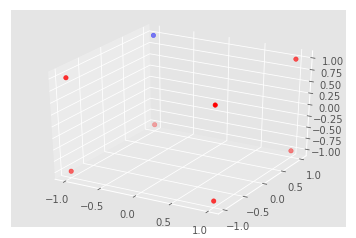

In [197]:
for x in (-1,1):
    for y in (-1,1):
        for z in (-1,1):
            if x==-1 and y==1 and z==1: 
                pass 
r=(-1,1)
x,y,z = np.meshgrid(r,r,r)        
x,y,z = x.ravel(),y.ravel(),z.ravel()


data
c=np.ones(8) 
c=['r']*8
c[5]='b'
m=['o']*8
m[5]='^'

c,m

from mpl_toolkits.mplot3d import Axes3D
data = np.vstack((x,y,z)).transpose()
data.shape
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs,ys,zs=data[:,0],data[:,1],data[:,2]
ax.scatter(xs,ys,zs, c=c)
plt.xticks(np.arange(-1, 1.1, step=0.5))
plt.yticks(np.arange(-1, 1.1, step=0.5))
# plt.zticks(np.arange(-1, 1.1, step=0.5))
ax.axes.zaxis